In [38]:
import Functional_Fusion.dataset as ds
import Functional_Fusion.util as ut
import nibabel as nb 
import Functional_Fusion.array_convert as ac
base_dir = ut.get_base_dir()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


In [8]:
X,info,dataset_obj = ds.get_dataset(base_dir,
        dataset='MDTB',
        atlas='MNISymC2',
        sess='ses-s1',
        type='CondRun')


In [50]:
Y,infoY,dataset_objY = ds.get_dataset(base_dir,
        dataset='MDTB',
        atlas='MNISymCereb2',
        sess='ses-s1',
        type='CondRun')

In [56]:
#SymC2 

data_C2 = X

cond_vec = np.tile(np.arange(1,30),16)

part_vec = np.repeat(np.arange(1,17), 29)

tensor_4d = ac.flat2ndarray(data_C2, cond_vec, part_vec)

tensor_4d.shape

#cleaning tensor 

tensor_no_nans = np.nan_to_num(tensor_4d)

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1)

tensor_mean_subtract_C2 = tensor_no_nans - tensor_avg_cond


In [57]:
#SymCereb2

data_Cereb2 = Y

cond_vec = np.tile(np.arange(1,30),16)

part_vec = np.repeat(np.arange(1,17), 29)

tensor_4d = ac.flat2ndarray(data_Cereb2, cond_vec, part_vec)

tensor_4d.shape

#cleaning tensor 

tensor_no_nans = np.nan_to_num(tensor_4d)

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1)

tensor_mean_subtract_cereb2 = tensor_no_nans - tensor_avg_cond

In [64]:
#pontine7T

#cerebellum data

flat_data = ac.get_structure_data(structure='cereb_gray',  data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/data/group')

cond_vec = np.tile(np.arange(1,11),16)

part_vec = np.repeat(np.arange(1,17), 10)

tensor_4d = ac.flat2ndarray(flat_data, cond_vec, part_vec)

tensor_no_nans = np.nan_to_num(tensor_4d)

 #removing avg of all voxels + check to ensure no nans

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1) #this is the mean activity pattern 

tensor_mean_subtract_p = tensor_no_nans - tensor_avg_cond

has_nans = np.isnan(tensor_mean_subtract_p).any()


print(flat_data.shape)



AttributeError: module 'Functional_Fusion.array_convert' has no attribute 'get_structure_data'

In [58]:
var_c2 = ds.decompose_pattern_into_group_indiv_noise(tensor_mean_subtract_C2, criterion='global')
var_cereb2 = ds.decompose_pattern_into_group_indiv_noise(tensor_mean_subtract_cereb2, criterion='global')

In [60]:
var_norm_c2 = np.zeros((1,3)) #(10,3) means 10 rows, 3 variances; (1,3) means 1 row, 3 variances, etc 
var_norm_cereb2 = np.zeros((1,3))

for i in range(1): #number of rows 
    row_sum_c2 = np.sum(var_c2[i])
    var_norm_c2[i] = (var_c2[i]/row_sum_c2)*100

    row_sum_cereb2 = np.sum(var_cereb2[i])
    var_norm_cereb2[i] = (var_cereb2[i]/row_sum_cereb2)*100

print(var_norm_c2[0][0] + var_norm_c2[0][1] + var_norm_c2[0][2])

print(var_norm_c2)
print(var_norm_cereb2)



100.0
[[ 3.1394838   6.54269099 90.31782521]]
[[ 3.4805857   6.98535834 89.53405595]]


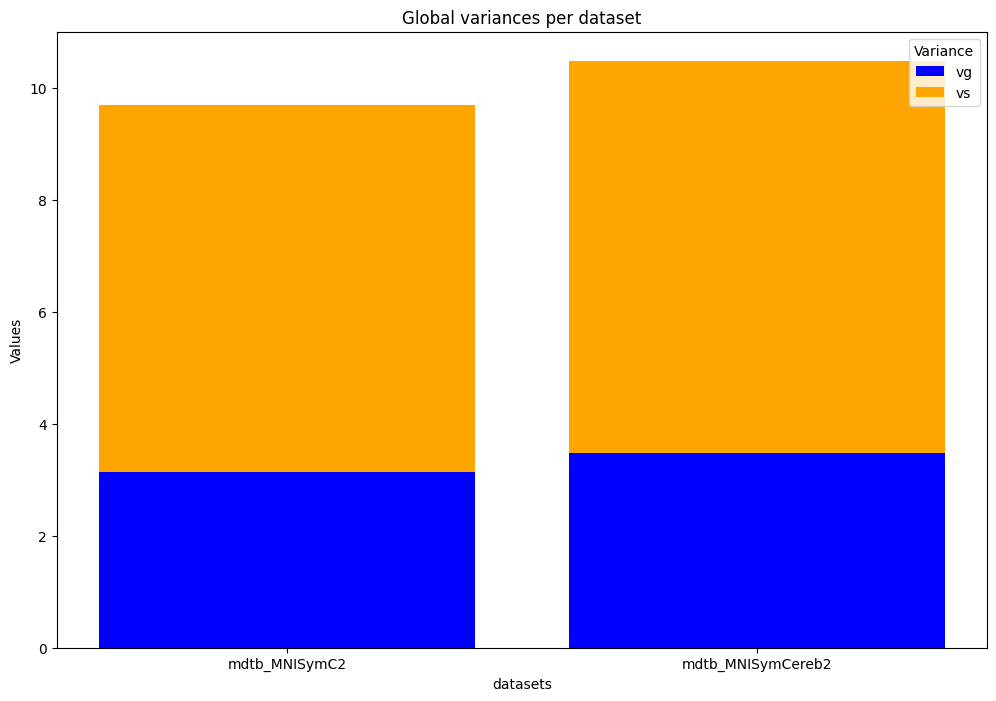

In [63]:
#plot global variances for each ROI

data = {
    'datasets': ['mdtb_MNISymC2', 'mdtb_MNISymCereb2'],
    'vg_C2': var_norm_c2[:, 0],
    'vs_C2': var_norm_c2[:, 1],
    'vg_cereb2': var_norm_cereb2[:, 0],
    'vs_cereb2': var_norm_cereb2[:, 1],
}

# Reshape the data into long format
df_stacked = pd.DataFrame({
    'datasets': data['datasets'] * len(data['vg_C2']),  # Repeat each dataset label for each observation
    'vg': list(data['vg_C2']) + list(data['vg_cereb2']),   # Concatenate vg values for both datasets
    'vs': list(data['vs_C2']) + list(data['vs_cereb2'])    # Concatenate vs values for both datasets
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot 'vg' as the base part of the bar
plt.bar(df_stacked['datasets'], df_stacked['vg'], label='vg', color='blue')

# Stack 'vs' on top of 'vg'
plt.bar(df_stacked['datasets'], df_stacked['vs'], bottom=df_stacked['vg'], label='vs', color='orange')

# Customize the plot
plt.xlabel('datasets')
plt.ylabel('Values')
plt.title('Global variances per dataset')
plt.legend(title='Variance', loc='upper right')
plt.ylim(top=11)
plt.show()